<a href="https://colab.research.google.com/github/123prith/Prithivi/blob/main/Project_Singapore_Resale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import math

In [ ]:
data= pd.read_csv("/content/resale-flat-prices-based-on-approval-date-1990-1999.csv")
data


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [ ]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [ ]:
#dropping price_per_sqft since we cannot use this for our prediction
data.drop('floor_area_sqm', axis = 1, inplace = True)


In [ ]:
#any columns with only 1 unique value will not be helpful in a prediction model
for x in data.columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 1:
        data.drop(x, axis=1, inplace=True)
        print(f'{x} column dropped due to having only 1 unique value')
        print()

month 120
town 26
flat_type 7
block 1094
street_name 417
storey_range 9
flat_model 13
lease_commence_date 31
resale_price 3785


In [ ]:
#Dropping all value as it is only use for identification
data.drop('town',axis = 1, inplace=True)

In [ ]:
data.drop(['flat_type','block', 'street_name', 'storey_range', 'flat_model','lease_commence_date','resale_price'], axis = 1, inplace = True)

In [ ]:
data.select_dtypes(include='object').columns

Index(['month'], dtype='object')

In [ ]:
X = data['floor_area_sqm'].to_frame()
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#no skew no scale
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)
print('Linear Regression score:',lr.score(X_train,y_train))
ypred=lr.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_test,ypred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,ypred)))
print('Test Score: ',lr.score(X_test, y_test))
print('Train Score: ', lr.score(X_train, y_train))

-128714.72358932614
[3731.41963981]
Linear Regression score: 0.6345316473528975
Mean Squared Error:  5961843142.580874
Root Mean Squared Error:  77212.97263142298
Test Score:  0.6372873330314575
Train Score:  0.6345316473528975


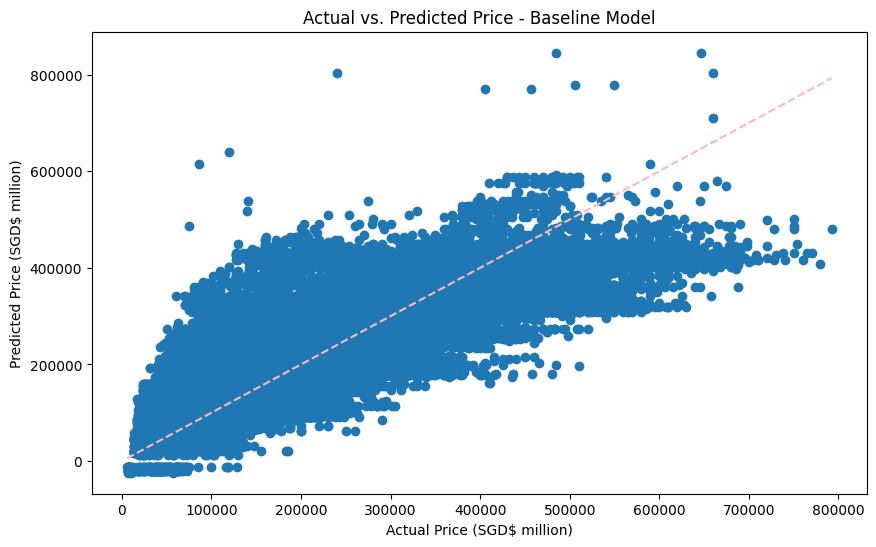

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ypred)
#best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'lightpink', linestyle = 'dashed')
plt.xlabel('Actual Price (SGD$ million)')
plt.ylabel('Predicted Price (SGD$ million)')
plt.title('Actual vs. Predicted Price - Baseline Model')
plt.show()

Text(0.5, 0, 'Resale Price (SGD$ million)')

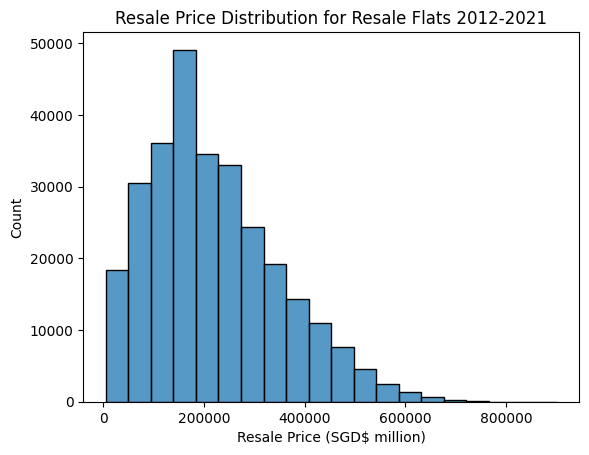

In [ ]:
#EDA Exploratory Data Analysis
#Plot to look at resale prices distribution
sns.histplot(data=data, x= 'resale_price', bins=20, stat='count')
plt.title('Resale Price Distribution for Resale Flats 2012-2021')
plt.xlabel('Resale Price (SGD$ million)')

In [ ]:
two_unique_values_col_num = []
for x in data.select_dtypes(include=('int64', 'float64')).columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 2:
        two_unique_values_col_num.append(x)


floor_area_sqm 199
lease_commence_date 31
resale_price 3785


[]

In [ ]:
data['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24'], dtype=object)